# MLDA@EEE Workshop Part III - Classification

* Agenda
  * Briefing to Concepts and Theory ~ 30m
  * Walkthrough of Code for building up Decision Tree Classifier using sklearn ~ 50m
  * Summary & Briefing ~ 10m
* Notebook available on [github](https://github.com/Xfan1025/MLDA-Workshop/tree/master/MLDA-workshops)
* Algorithm to cover: Decision Tree. [Recommend reading](https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1)
* Data: **Titanic: Machine Learning from Disaster** [link to data on kaggle](https://www.kaggle.com/c/titanic/data)

## Introduction

![intro](./assets/classification-intro.png)

* Classification is the task of assigning objects to one of the several predefined categories(classes)
* Classification has many applications
  * Email spam & fraud detection
  * Facial recognition
  * Medical detection (eg. tumor/cancer detection)
  * Self-driving car
  * .etc
  
## Workflow
* Typical workflow for ML engineers consists of two phases: **training** and **inference** phase.
* Training phase generally refers to learning a mapping function, y=f(X), that can predict the class label y of a given data sample X.

#### Overview of training pipeline
![appraoch](./assets/classification-approach.png)


### Evaluation
Mathematical measurements of your model's performance. Typical metrics:
* Accuracy / Error Rate
* Sensitivity / Specificity
* Precision / Recall
* F1 Score

<img src='./assets/eval-1.png' style="float: left;" width='400' height='500'> <img src='./assets/eval-2.png' style="float: right;" width='400' height='500'>



### Inference
**Inference** refers to the step where the trained model is used to predict the class labels for coming (unseen) data. It is highly linked to production deployment.

## Algorithms
There are many popular classification algorithms. To name a few:
* Bayesian classification
* Decition Tree
* Support Vector Machine
* Neural Network

## Intro to Decision Trees
* A decision tree is a flowchart-like tree structrue, where
  * each internal node (non-leaf node) denotes a test on an attribute
  * each branch represents an outcome of the test
  * each leaf node holds a class label
  
![dt-intro](./assets/DT-intro.png)

### Intuition

* Considering the case of a computer shop:
<img src="./assets/example-1.png" width="80%" height="80%">

* The result of partitioning dataset using the age attribute
<img src="./assets/example-2.png" width="80%" height="80%">

* The intuition behind decision trees is based on the idea that we can classify an object through asking a sequence of questions about its attributes

### Attribute Selection Measurements
* A scientific way of determining how the dataset at a given node is to be split
* It provides a ranking for attribute describing the given training samples
* Popular measurements for attribute selection:
  * Information Gain - ID3
  * Gain Ratio - C4.5
  * Gini Index - CART
 
* Fun math for you to play with:
  * Search the formula of entropy
  * Compute information gain of 1) equally distributed classes 2) uniformly distributed class
* For detailed formula and computation, refer to [wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning#Metrics) or [sklearn implementation](https://en.wikipedia.org/wiki/Decision_tree_learning#Metrics)
* Many ML library implemented the DT classifier for you and allows you to choose between those measurements with ease!

### Hands On
* Kaggle competition - **Titanic: Machine Learning from Disaster**
  * Binary Classification - Predict if a person can survive on Titanic or not
* Notebook available on [github](https://github.com/Xfan1025/MLDA-Workshop/tree/master/MLDA-workshops)
* Data: **Titanic: Machine Learning from Disaster** [link to data on kaggle](https://www.kaggle.com/c/titanic/data)

In [1]:
# import some packages you learned in previous workshops
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Feature Engineering

In [5]:
# columns with missing values
print(train_data.columns[train_data.isnull().any()].tolist())
print(test_data.columns[test_data.isnull().any()].tolist())

['Age', 'Cabin', 'Embarked']
['Age', 'Fare', 'Cabin']


#### Pclass

In [6]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### Sex

In [7]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
for dataset in [train_data, test_data]:
    dataset['Sex'] = dataset.Sex.map({'male':0, 'female':1}).astype(int)

#### Age - discretized

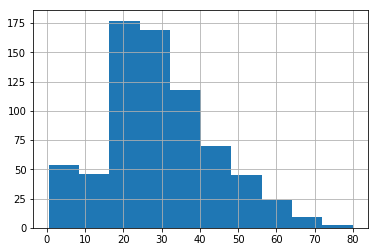

In [9]:
train_data.Age.hist()

In [10]:
train_data.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [11]:
for dataset in [train_data, test_data]:
    # fill in missing value
    age_avg = dataset.Age.mean()
    age_std = dataset.Age.std()
    
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = np.random.randint(age_avg - age_std, 
                                                                     age_avg + age_std, 
                                                                     size=dataset['Age'].isnull().sum())
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

#### SibSp&Parch - Combined and Discretized

In [12]:
train_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [14]:
for dataset in [train_data, test_data]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']

#### Cabin - binarilized

In [15]:
train_data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
F2             3
F33            3
C22 C26        3
E101           3
C52            2
B77            2
C65            2
B28            2
B35            2
C68            2
E33            2
E67            2
D35            2
B22            2
C93            2
E8             2
C83            2
F4             2
C123           2
B5             2
E44            2
C78            2
D20            2
B58 B60        2
B51 B53 B55    2
C92            2
              ..
A19            1
D50            1
C90            1
A14            1
C91            1
E63            1
B42            1
C47            1
T              1
F G63          1
E58            1
B37            1
D6             1
C99            1
B69            1
E77            1
D48            1
A20            1
B82 B84        1
E17            1
E50            1
A34            1
C106           1
C110           1
C70            1
C82            1
D21            1
D45           

In [16]:
for dataset in [train_data, test_data]:
    dataset['Has_Cabin'] = dataset['Cabin'].isna().tolist()

#### Fare - Discretized

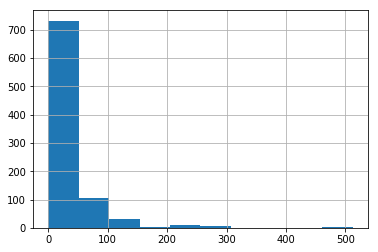

In [17]:
train_data.Fare.hist()

In [18]:
for dataset in [train_data, test_data]:
    dataset.loc[dataset['Fare'] <= 50, 'Fare'] = 0
    dataset.loc[dataset['Fare'] > 50, 'Fare'] = 1
    dataset.loc[np.isnan(dataset['Fare']), 'Fare'] = 0
    dataset['Fare'] = dataset['Fare'].astype(int)

#### Drop PassengerId, Name, Ticket, Cabin, SibSp, Parch, Embarked

In [19]:
drop_features = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Embarked']
for dataset in [train_data, test_data]:
    dataset.drop(drop_features, axis=1, inplace=True)

In [20]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Has_Cabin
0,0,3,0,1,0,1,True
1,1,1,1,2,1,1,False
2,1,3,1,1,0,0,True
3,1,1,1,2,1,1,False
4,0,3,0,2,0,0,True


In [21]:
test_data.head()

,Pclass,Sex,Age,Fare,FamilySize,Has_Cabin
0,3,0,2,0,0,True
1,3,1,2,0,1,True
2,2,0,3,0,0,True
3,3,0,1,0,0,True
4,3,1,1,0,2,True


## Decision Tree Classifier

In [22]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [23]:
train_features = train_data.drop(['Survived'], axis=1).values
train_labels = train_data['Survived']

dt_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_clf.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Tree visualization

In [24]:
import graphviz

In [25]:
dot_data = tree.export_graphviz(dt_clf, out_file=None,
                                feature_names=train_data.drop(['Survived'], axis=1).columns.tolist(),
                                class_names=['Survived', 'Died'],
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)


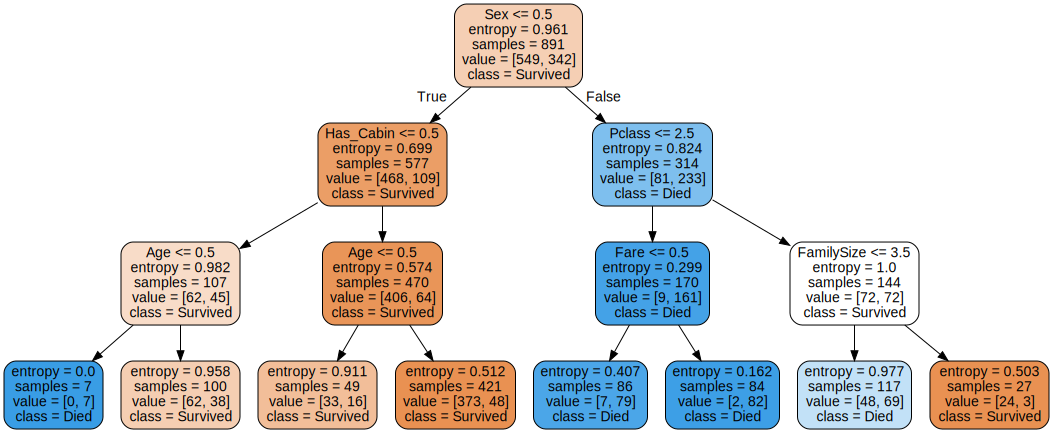

In [27]:
graph

## prediction submission

In [28]:
test_features = test_data.values

In [29]:
pred_labels = dt_clf.predict(test_features)

In [30]:
submission = pd.read_csv('./data/gender_submission.csv')
submission['Survived'] = pred_labels

In [31]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [32]:
submission.to_csv('submission.csv', index=False)